<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/DataScience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trafik Kazaları Analizi**
Problem tanımı: Bu veri seti UK’de 2000-2016 yıllarına ait 1.6 milyondan fazla trafik kazası verilerini içermektedir. Bu veri seti aracılığıyla aşağıdaki gibi sorulara yanıt aranmaktadır.

* Trafik akışının değişmesi kazaları nasıl etkiler?
* Kaza oranlarını ne artırır?
* Zaman içinde kaza oranlarını tahmin edebilir miyiz?
* Kırsal ve kentsel alanlar nasıl farklılaştı?

Veri Seti : https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales

In [ ]:
#Kütüphanelerin tanımlanması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as px
import plotly.express as px
import random
import plotly.figure_factory as ff

In [ ]:
# Veri Setleri Okunuyor
df1 = pd.read_csv("/content/accidents_2005_to_2007.csv")
df2 = pd.read_csv("/content/accidents_2009_to_2011.csv")
df3 = pd.read_csv("/content/accidents_2012_to_2014.csv")

<ipython-input-5-2a75cc2b0129>:2: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-5-2a75cc2b0129>:4: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
datas = pd.concat([df1,df2,df3])
datas

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [ ]:
datas.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
datas.shape

(1504150, 33)

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [ ]:
data = datas.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [ ]:
data.head(10)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
5,3,2,1,3,12:40,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
6,3,2,1,5,20:40,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
7,3,1,2,6,17:35,Dual carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
8,3,2,2,7,22:43,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
9,3,2,5,7,16:00,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005


In [ ]:
data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

>Yıllara göre trafik kazası sayıları

In [ ]:
year = data["Year"].value_counts()
year

2005    198474
2006    188913
2007    181881
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: Year, dtype: int64

>Haftalık Gün Bazında Yıllara göre yapılmış kazalar

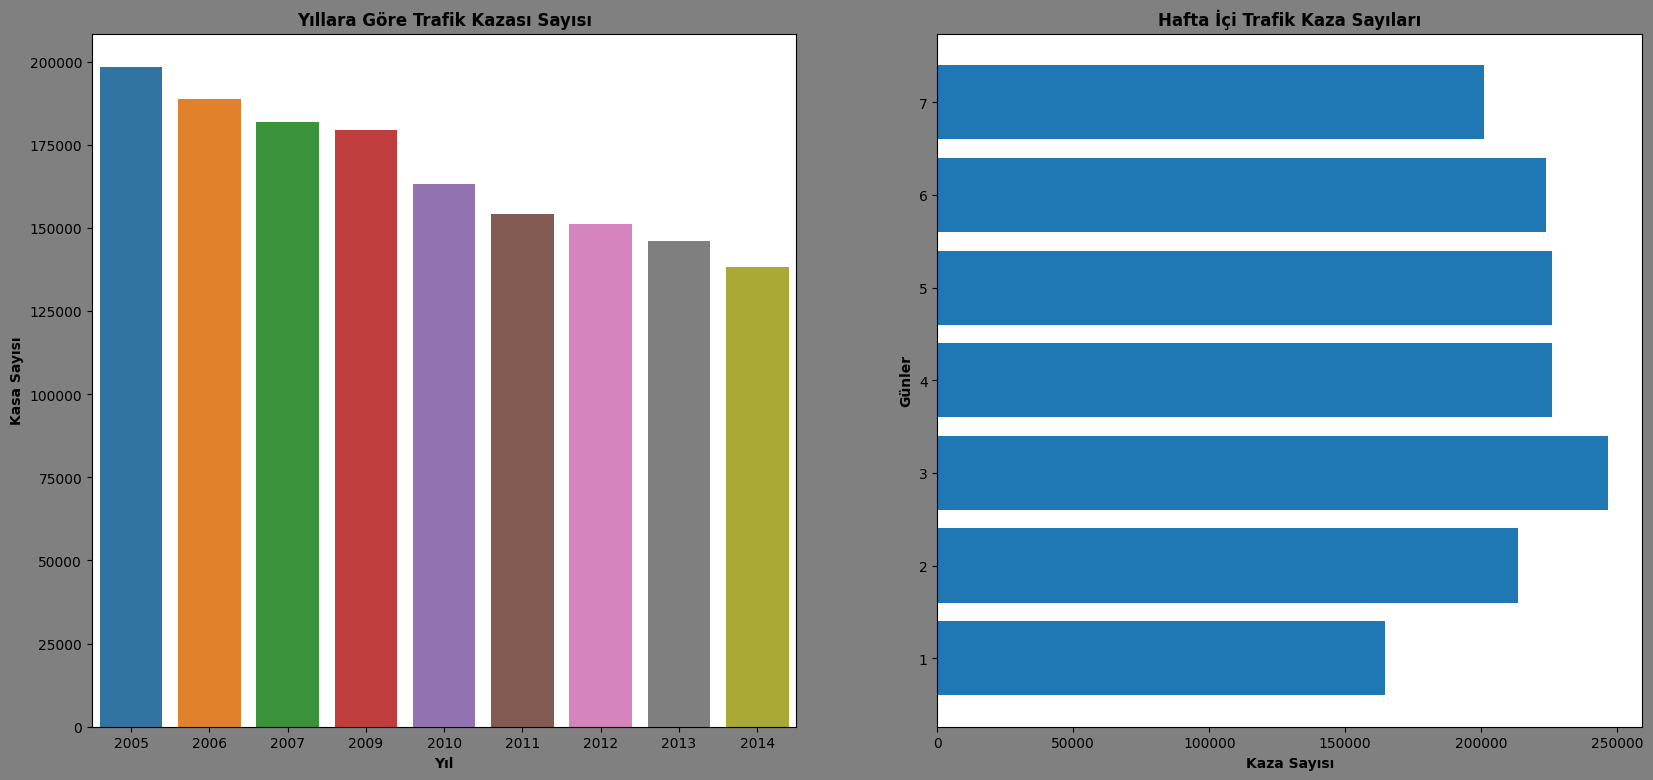

In [ ]:
import seaborn as sns
year = data["Year"].value_counts()

years = data["Year"].unique()
num = year.values

week = data["Day_of_Week"].value_counts()
week
weeks = data["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Kasa Sayısı",weight="bold")
plt.xlabel("Yıl",weight="bold")

plt.title("Yıllara Göre Trafik Kazası Sayısı",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Hafta İçi Trafik Kaza Sayıları",weight="bold")
plt.xlabel("Kaza Sayısı",weight="bold")
plt.ylabel("Günler",weight="bold")
plt.show()

>Saat bazında kaza sayıları

<function matplotlib.pyplot.show(close=None, block=None)>

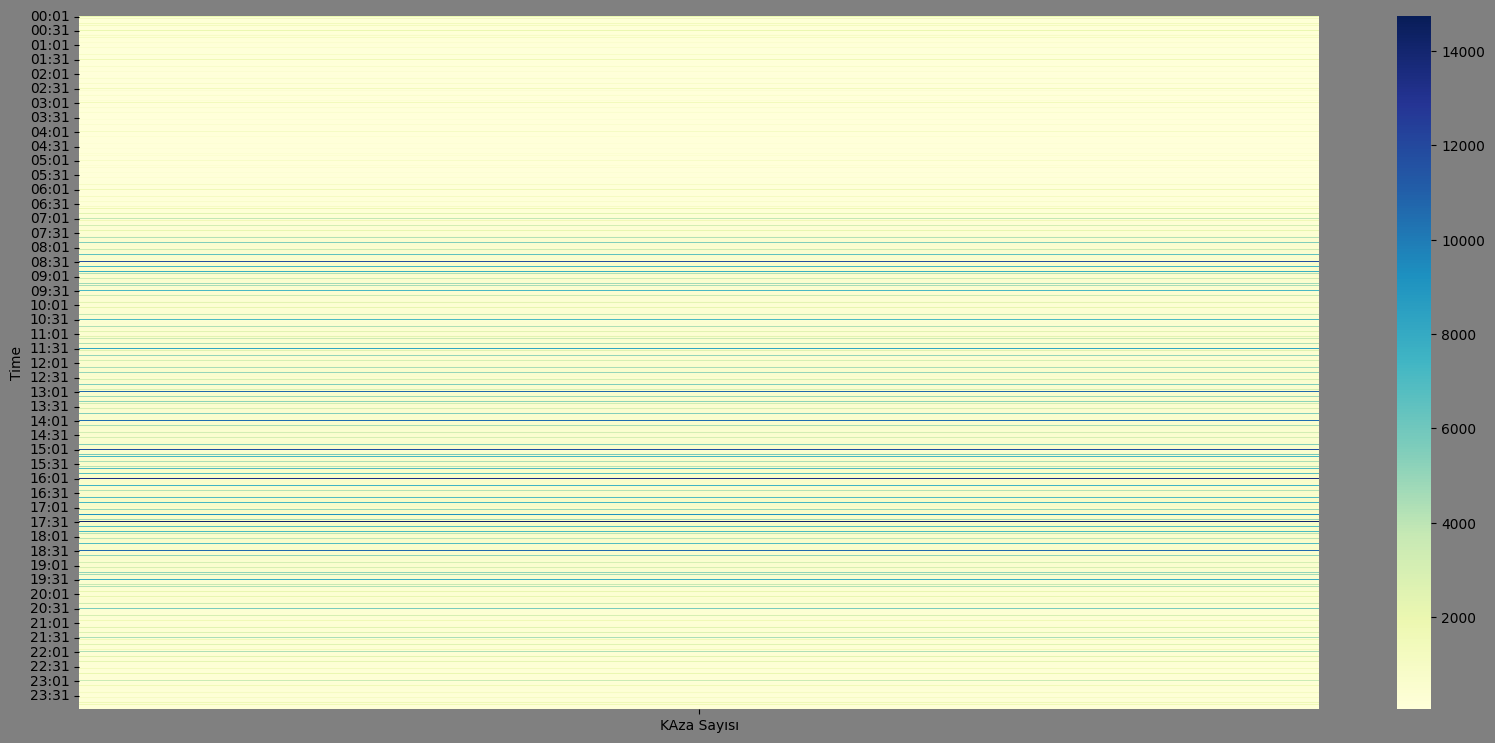

In [ ]:
time = data["Time"].value_counts()

time_df = pd.DataFrame(time, index=data["Time"])
time_df.columns =['KAza Sayısı']
time_heat = time_df.groupby('Time').min()

plt.figure(figsize = (20,9),facecolor='grey')
ax = sns.heatmap(time_heat,cmap="YlGnBu")
plt.yticks(rotation =0)
plt.show

>Hava durumunun trafik kazaları üzerindeki etkisi

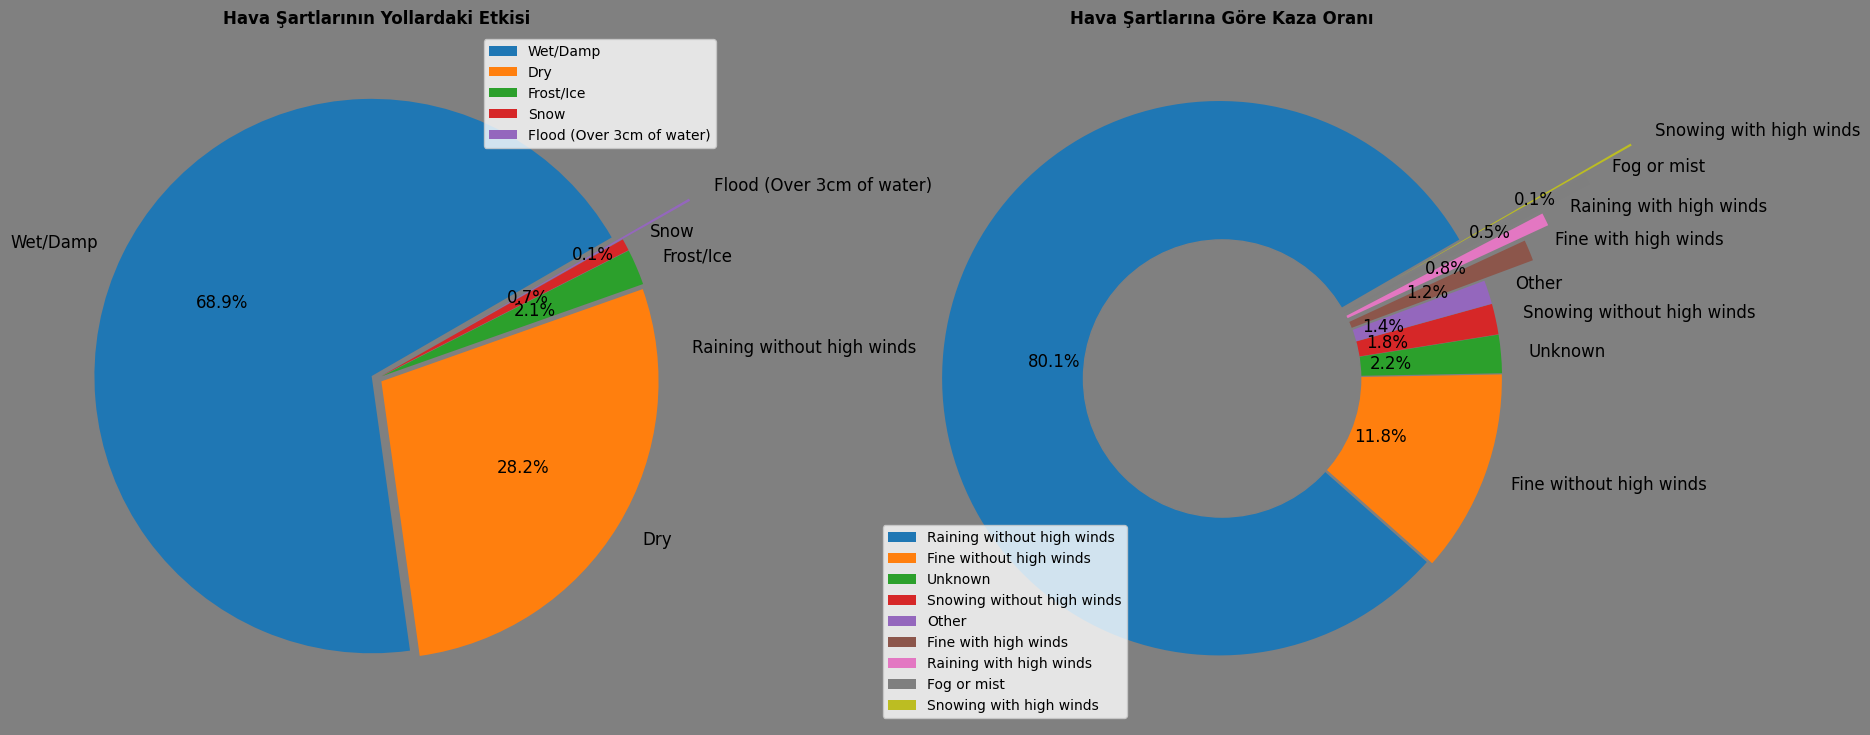

In [ ]:
road_cond = data["Road_Surface_Conditions"].value_counts()

road_cond_arr = data["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

weather_cond = data["Weather_Conditions"].value_counts()

weather_cond_arr = data["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values
plt.figure(figsize = (20,9),facecolor='grey')
plt.subplot(1, 2, 1)

plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.legend()
plt.title("Hava Şartlarının Yollardaki Etkisi",weight="bold")


plt.subplot(1, 2, 2)

plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc ="lower left")
plt.title("Hava Şartlarına Göre Kaza Oranı",weight="bold")

my_circle = plt.Circle((0,0),0.5, color ='grey')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.show()

> Kent ve kırsal alanlardaki kazar oranı farkı

<ipython-input-29-de01b4f82921>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



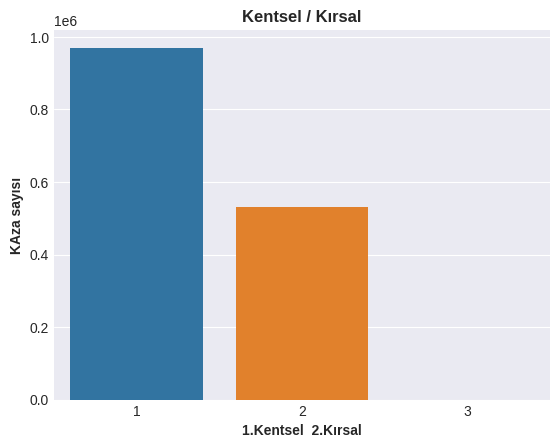

In [ ]:
data["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("KAza sayısı",weight="bold")
plt.xlabel("1.Kentsel  2.Kırsal",weight="bold")
plt.title("Kentsel / Kırsal",weight="bold")

plt.show()

>Kazaların şiddeti ile ölü sayısı arasındaki ilişki

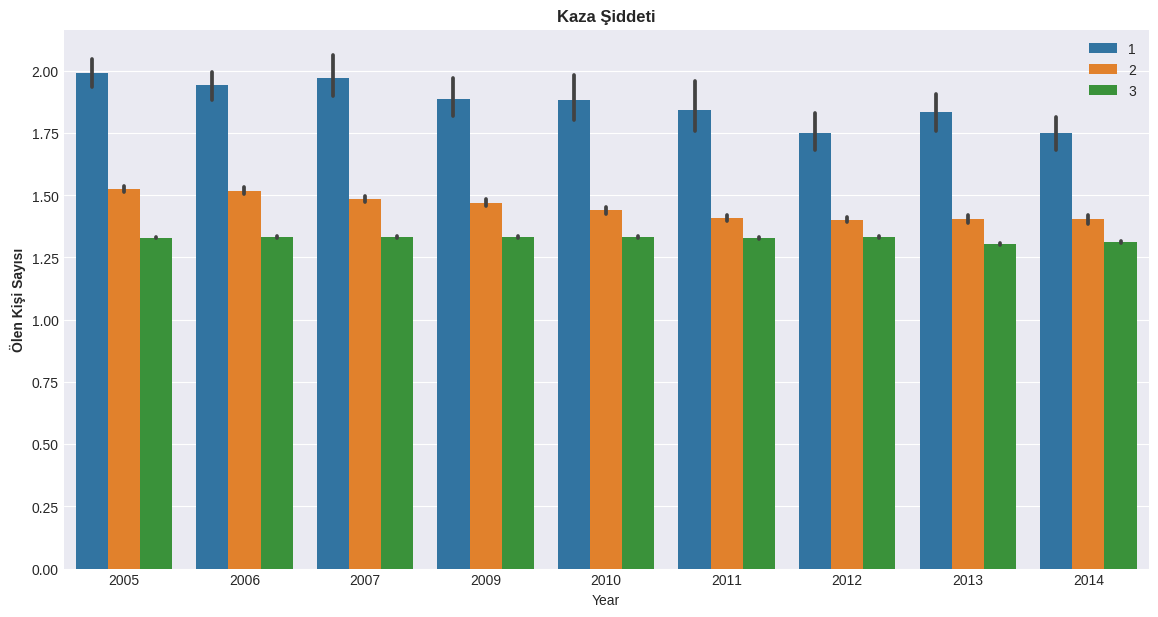

In [ ]:
plt.figure(figsize = (14,7))
sns.barplot(x="Year",y="Number_of_Casualties",data=data,hue="Accident_Severity")
plt.title("Kaza Şiddeti",weight="bold")
plt.ylabel("Ölen Kişi Sayısı",weight="bold")
plt.legend(loc="upper right")
plt.show()

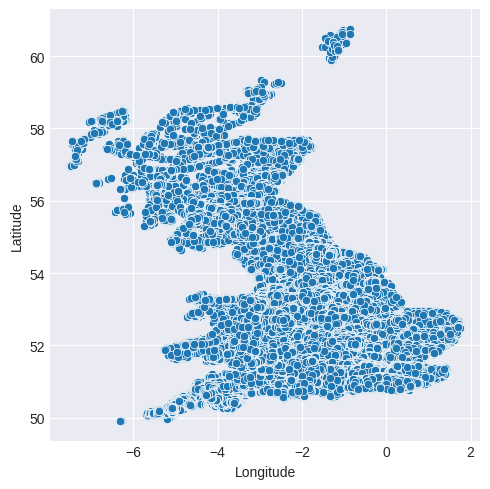

In [ ]:
sns.relplot(data=datas,x="Longitude",y="Latitude")

## **Modelin Oluştrulması**

In [ ]:
data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [ ]:
data["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [ ]:
data["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in data["Road_Type"]]

In [ ]:
data["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [ ]:
data["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9
                          for each in data["Weather_Conditions"]]

In [ ]:
data["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [ ]:
data["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5
                          for each in data["Road_Surface_Conditions"]]

In [ ]:
data["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [ ]:
data["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5
                          if each == "Darkeness: No street lighting" else 6
                          for each in data["Light_Conditions"]]

In [ ]:
data.drop(["Time"], axis=1, inplace=True)

In [ ]:
data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,1,1,1,1,1,2005
1,3,1,1,4,2,2,2,2,1,2005
2,3,2,1,5,1,2,2,2,1,2005
3,3,1,1,6,1,1,2,2,1,2005
4,3,1,1,2,1,3,2,1,1,2005


In [ ]:
X = data.drop(["Accident_Severity"],axis=1).values
y = data["Accident_Severity"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1201565, 9), (300392, 9), (1201565,), (300392,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Training model
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 213.7284219264984


In [50]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.13283485344310164
Testing score:   0.002364313894063108
Root Mean Squared Error: 0.40149054933740513


**Knn Algoritmasının Uygulanması**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

result1 = classification_report(y_test,y_pred)
print("Classifier Report")
print(result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy Score")
print(result2)

Confusion Matrix
[[    24    329   3593]
 [    67   2112  38392]
 [   203   6631 249041]]
Classifier Report
              precision    recall  f1-score   support

           1       0.08      0.01      0.01      3946
           2       0.23      0.05      0.09     40571
           3       0.86      0.97      0.91    255875

    accuracy                           0.84    300392
   macro avg       0.39      0.34      0.34    300392
weighted avg       0.76      0.84      0.79    300392

Accuracy Score
0.8361640789368558


---

# **Trafik Kazaları Analizi**
Problem tanımı: Bu veri seti UK’de 2000-2016 yıllarına ait 1.6 milyondan fazla trafik kazası verilerini içermektedir. Bu veri seti aracılığıyla aşağıdaki gibi sorulara yanıt aranmaktadır.

* Trafik akışının değişmesi kazaları nasıl etkiler?
* Kaza oranlarını ne artırır?
* Zaman içinde kaza oranlarını tahmin edebilir miyiz?
* Kırsal ve kentsel alanlar nasıl farklılaştı?

Veri Seti : https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Veri Setleri Okunuyor
df_1 = pd.read_csv("/content/accidents_2005_to_2007.csv")
df_2 = pd.read_csv("/content/accidents_2009_to_2011.csv")
df_3 = pd.read_csv("/content/accidents_2012_to_2014.csv")

In [66]:
datas1 = pd.concat([df1,df2,df3])
datas1

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [68]:
datas1.shape

(1504150, 33)

In [69]:
datas1.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [70]:
datas1.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [72]:
datas1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [73]:
datas1 = datas1.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Year"]]

In [74]:
datas1.tail(10)

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
464687,3,1,2,24/11/2014,06:50,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2014
464688,1,3,3,25/11/2014,15:30,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014
464689,3,1,4,03/12/2014,19:30,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Fog or mist,Wet/Damp,2014
464690,3,1,7,06/12/2014,03:00,917,S12000006,Single carriageway,40,Darkeness: No street lighting,Other,Wet/Damp,2014
464691,3,1,2,08/12/2014,09:16,917,S12000006,Dual carriageway,70,Daylight: Street light present,Fine without high winds,Snow,2014
464692,2,1,1,07/12/2014,22:20,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014
464693,3,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2014
464694,3,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014
464695,2,2,4,17/12/2014,06:55,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014
464696,3,2,4,24/12/2014,15:00,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2014


In [75]:
datas1.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Year                             0
dtype: int64

In [77]:
datas1.shape

(1504150, 13)

In [79]:
datas1 = datas1.dropna()
datas1.shape

(1501957, 13)

In [80]:
datas1.isnull().sum()

Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Year                          0
dtype: int64

In [81]:
datas1.dtypes

Accident_Severity              int64
Number_of_Casualties           int64
Day_of_Week                    int64
Date                          object
Time                          object
Local_Authority_(District)     int64
Local_Authority_(Highway)     object
Road_Type                     object
Speed_limit                    int64
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Year                           int64
dtype: object

In [82]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
selRows = datas1[datas1['Time'].isna()].index
datas1 = datas1.drop(selRows, axis=0)
datas1["Time"] = pd.to_datetime(datas1["Time"], format='%H:%M')
datas1["Hour"] = datas1["Time"].dt.hour
datas1["Month"] = pd.DatetimeIndex(datas1["Date"]).month

In [83]:
datas1.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                   int64
Hour                                   int64
Month                                  int64
dtype: object

In [87]:
datas1

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Hour,Month
0,2,1,3,04/01/2005,1900-01-01 17:42:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,17,4
1,3,1,4,05/01/2005,1900-01-01 17:36:00,12,E09000020,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,17,5
2,3,1,5,06/01/2005,1900-01-01 00:15:00,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,0,6
3,3,1,6,07/01/2005,1900-01-01 10:35:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,10,7
4,3,1,2,10/01/2005,1900-01-01 21:13:00,12,E09000020,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2,1,1,07/12/2014,1900-01-01 22:20:00,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014,22,7
464693,3,2,5,11/12/2014,1900-01-01 06:40:00,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2014,6,11
464694,3,1,3,09/12/2014,1900-01-01 02:00:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014,2,9
464695,2,2,4,17/12/2014,1900-01-01 06:55:00,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014,6,12


In [88]:
datas1["Year"].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

In [89]:
datas1.Year = datas1.Year.astype(str)
kaza_sayisi = datas1.groupby("Year")

In [90]:
toplam_kaza_sayisi=pd.DataFrame(kaza_sayisi.size().sort_values(ascending=False),columns=["Sayı"])

In [91]:
toplam_kaza_sayisi

,Sayı
Year,
2005,198474
2006,188913
2007,181881
2012,179436
2009,163334
2010,154185
2011,151241
2014,146100
2013,138393


Text(0.5, 1.0, 'Yıllara göre kaza sayısı')

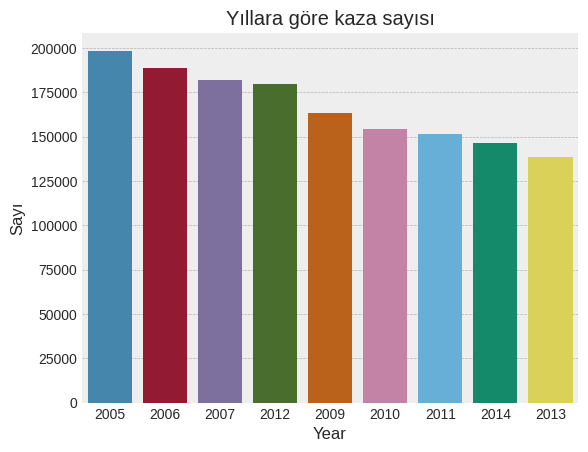

In [92]:
sns.barplot(y = toplam_kaza_sayisi["Sayı"] , x = toplam_kaza_sayisi.index)
plt.title("Yıllara göre kaza sayısı")

In [94]:
datas1["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [95]:
datas1.dtypes

Accident_Severity                      int64
Number_of_Casualties                   int64
Day_of_Week                            int64
Date                                  object
Time                          datetime64[ns]
Local_Authority_(District)             int64
Local_Authority_(Highway)             object
Road_Type                             object
Speed_limit                            int64
Light_Conditions                      object
Weather_Conditions                    object
Road_Surface_Conditions               object
Year                                  object
Hour                                   int64
Month                                  int64
dtype: object

In [96]:
datas1.Hour = datas1.Hour.astype(str)
datas1.Month = datas1.Month.astype(str)

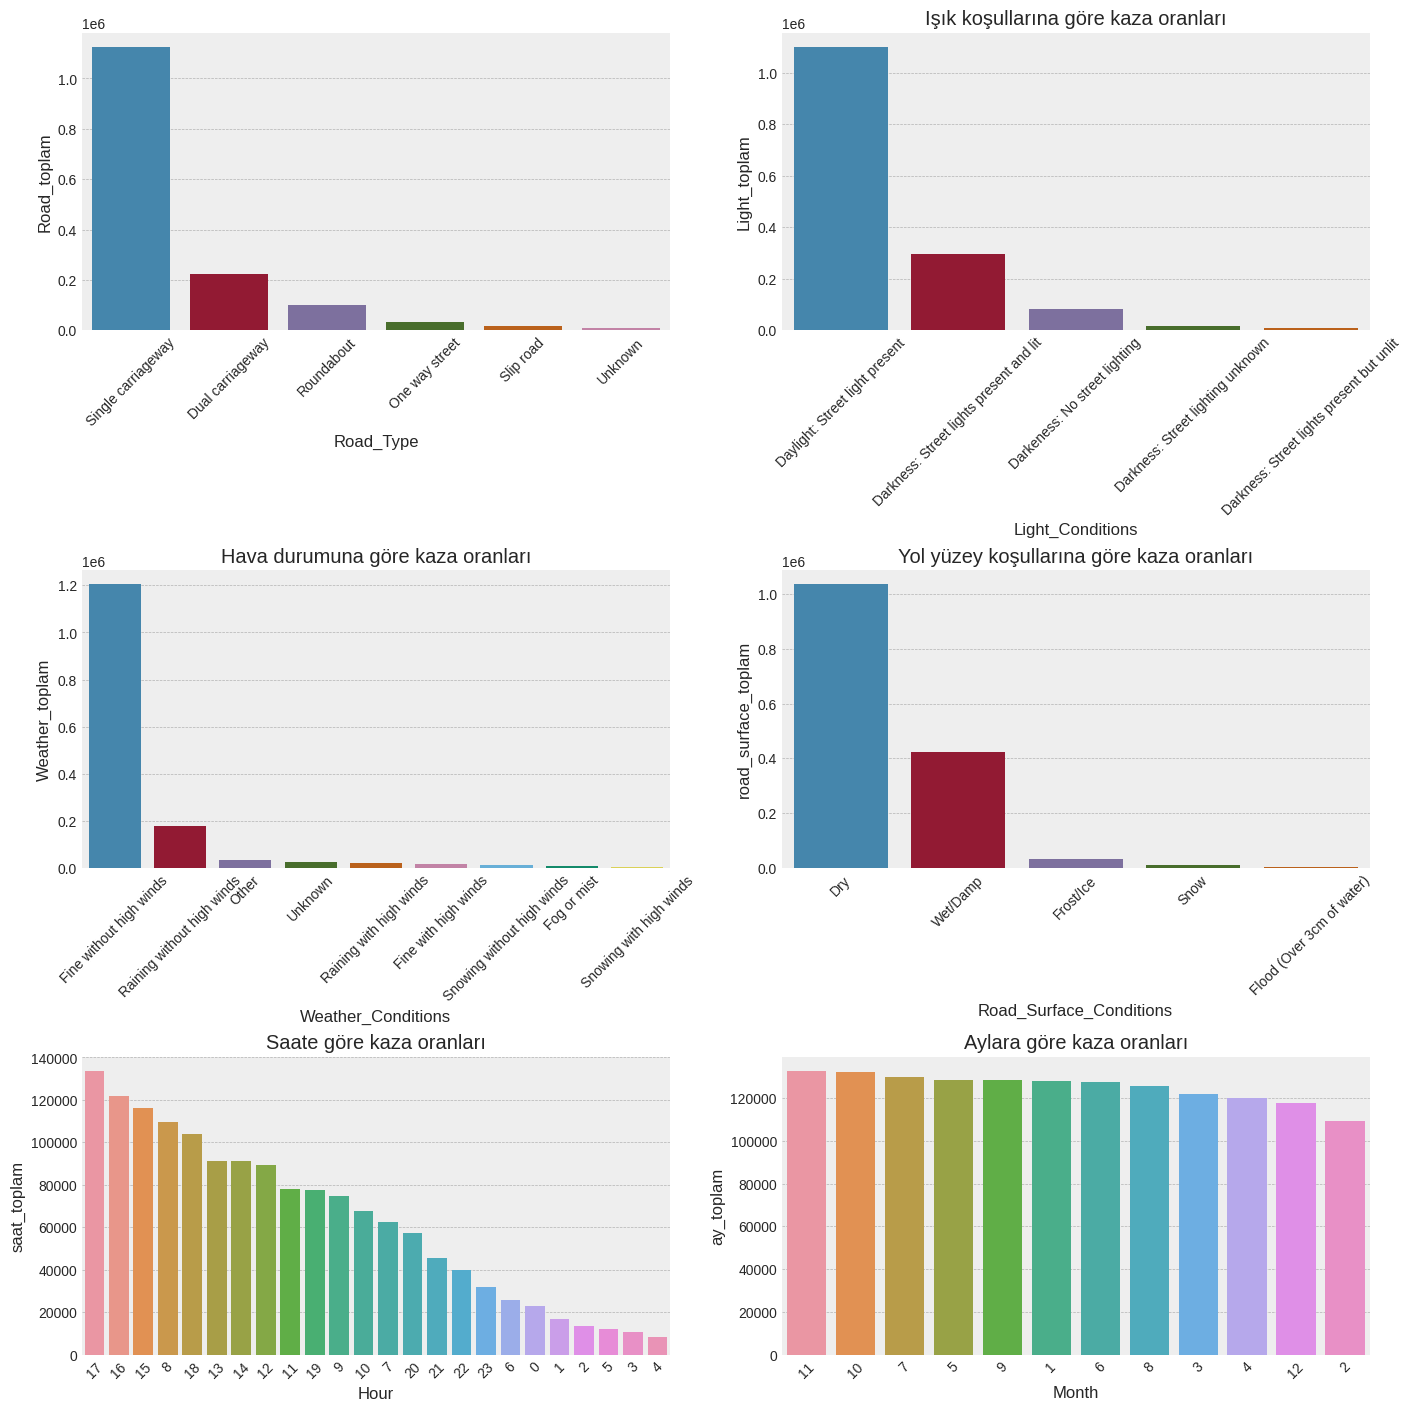

In [104]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

road_sayisi = datas1.groupby("Road_Type")
toplam_road=pd.DataFrame(road_sayisi.size().sort_values(ascending=False),columns=["Road_toplam"])

light_sayisi = datas1.groupby("Light_Conditions")
toplam_light=pd.DataFrame(light_sayisi.size().sort_values(ascending=False),columns=["Light_toplam"])

weather_sayisi = datas1.groupby("Weather_Conditions")
toplam_weather=pd.DataFrame(weather_sayisi.size().sort_values(ascending=False),columns=["Weather_toplam"])

surface_sayisi = datas1.groupby("Road_Surface_Conditions")
toplam_surface=pd.DataFrame(surface_sayisi.size().sort_values(ascending=False),columns=["road_surface_toplam"])

saat_sayisi = datas1.groupby("Hour")
toplam_saat=pd.DataFrame(saat_sayisi.size().sort_values(ascending=False),columns=["saat_toplam"])

ay_sayisi = datas1.groupby("Month")
toplam_ay=pd.DataFrame(ay_sayisi.size().sort_values(ascending=False),columns=["ay_toplam"])



ax=sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_light.index,y=toplam_light["Light_toplam"], data=toplam_light, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_weather.index,y=toplam_weather["Weather_toplam"], data=toplam_weather, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_surface.index,y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_saat.index,y=toplam_saat["saat_toplam"], data = toplam_saat, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_ay.index,y=toplam_ay["ay_toplam"], data=toplam_ay, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

axs[0, 1].title.set_text('Işık koşullarına göre kaza oranları')
axs[1, 0].title.set_text('Hava durumuna göre kaza oranları')
axs[1, 1].title.set_text('Yol yüzey koşullarına göre kaza oranları')
axs[2, 0].title.set_text('Saate göre kaza oranları')
axs[2, 1].title.set_text('Aylara göre kaza oranları')

Text(0.5, 1.0, 'Hıza göre kaza sayısı')

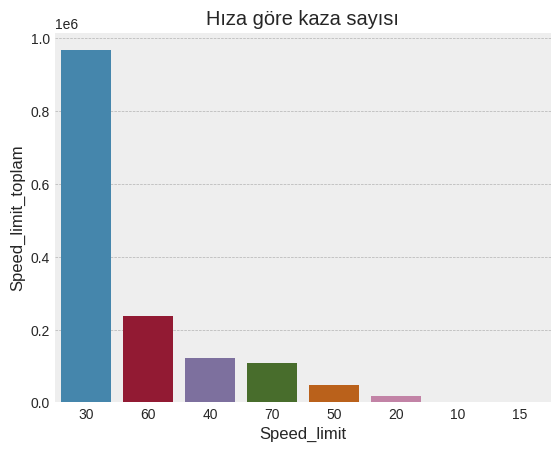

In [105]:
datas1.Speed_limit = datas1.Speed_limit.astype(str)
speed_sayisi = datas1.groupby("Speed_limit")
toplam_speed=pd.DataFrame(speed_sayisi.size().sort_values(ascending=False),columns=["Speed_limit_toplam"])
sns.barplot(y = toplam_speed["Speed_limit_toplam"] , x = toplam_speed.index)
plt.title("Hıza göre kaza sayısı")

In [108]:
datas1["Number_of_Casualties"].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54])

In [110]:
datas1.Hour = datas1.Hour.astype(int)

In [111]:
df = pd.get_dummies(datas1, columns=['Road_Type','Weather_Conditions','Light_Conditions','Road_Surface_Conditions',])

In [112]:
df.dtypes

Accident_Severity                                                      int64
Number_of_Casualties                                                   int64
Day_of_Week                                                            int64
Date                                                                  object
Time                                                          datetime64[ns]
Local_Authority_(District)                                             int64
Local_Authority_(Highway)                                             object
Speed_limit                                                           object
Year                                                                  object
Hour                                                                   int64
Month                                                                 object
Road_Type_Dual carriageway                                             uint8
Road_Type_One way street                                               uint8

In [113]:
df.Speed_limit = df.Speed_limit.astype(int)

In [114]:
yarali_sayisi = df["Number_of_Casualties"].values
kategori = []
for num in yarali_sayisi:
    if num == 1:
        kategori.append("1 yarali")
    elif num > 1 and num < 3 :
        kategori.append("1 ile 3 arasi")
    elif num > 3 and num < 6 :
        kategori.append("3 ile 6 arasi")
    elif num > 6 and num < 9 :
        kategori.append("6 ile 9 arasi")
    elif num > 9 and num < 12 :
        kategori.append("9 ile 12 arasi")
    else:
        kategori.append("12'den cok")
kategori = pd.DataFrame(data=kategori, columns=["Kategori"])
df = df.reset_index(drop=True)
data = pd.concat([df, kategori], axis=1)
data.drop(columns="Number_of_Casualties", axis=1, inplace=True)

In [116]:
data

,Accident_Severity,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Year,Hour,Month,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,04/01/2005,1900-01-01 17:42:00,12,E09000020,30,2005,17,4,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,05/01/2005,1900-01-01 17:36:00,12,E09000020,30,2005,17,5,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,06/01/2005,1900-01-01 00:15:00,12,E09000020,30,2005,0,6,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,07/01/2005,1900-01-01 10:35:00,12,E09000020,30,2005,10,7,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,10/01/2005,1900-01-01 21:13:00,12,E09000020,30,2005,21,10,...,1,0,0,0,0,0,0,0,1,1 yarali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501952,2,1,07/12/2014,1900-01-01 22:20:00,917,S12000006,70,2014,22,7,...,0,0,0,0,0,0,0,1,0,1 yarali
1501953,3,5,11/12/2014,1900-01-01 06:40:00,917,S12000006,70,2014,6,11,...,0,0,0,0,0,0,0,1,0,1 ile 3 arasi
1501954,3,3,09/12/2014,1900-01-01 02:00:00,917,S12000006,40,2014,2,9,...,0,1,0,0,0,0,1,0,0,1 yarali
1501955,2,4,17/12/2014,1900-01-01 06:55:00,917,S12000006,60,2014,6,12,...,0,0,0,0,0,0,0,0,1,1 ile 3 arasi


In [117]:
data['Kategori'].unique()

array(['1 yarali', '1 ile 3 arasi', '3 ile 6 arasi', "12'den cok",
       '6 ile 9 arasi', '9 ile 12 arasi'], dtype=object)

In [120]:
data.drop(columns=["Month","Year","Local_Authority_(Highway)","Local_Authority_(District)","Time","Date"], axis=1, inplace=True)

In [121]:
data.head(10)

,Accident_Severity,Day_of_Week,Speed_limit,Hour,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,...,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Kategori
0,2,3,30,17,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1 yarali
1,3,4,30,17,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
2,3,5,30,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
3,3,6,30,10,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1 yarali
4,3,2,30,21,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1 yarali
5,3,3,30,12,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1 yarali
6,3,5,30,20,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 yarali
7,3,6,30,17,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1 ile 3 arasi
8,3,7,30,22,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1 ile 3 arasi
9,3,7,30,16,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,3 ile 6 arasi


In [123]:
a=data.columns[0:29]
a

Index(['Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Hour',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Sur

In [124]:
data.to_csv('/content/sonhali.csv')

In [125]:
from sklearn.model_selection import train_test_split
col_isimler =a
tahmin_isimler = ['Kategori']
X = data[col_isimler].values

y = data[tahmin_isimler].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

## **Karar Ağaçları ile yaralı sayısını tahmin etme**

In [126]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [128]:
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Karar ağaçları ile eğitim başarısı : {0:.4f}".format(accuracy))

Karar ağaçları ile eğitim başarısı : 0.7788


In [131]:
dt_predict_test = dt_model.predict(X_test)

print(classification_report(y_test, dt_predict_test))
print("Karar Ağaçlarının test verisi üzerindeki performansı %s" %
      accuracy_score(y_test, dt_predict_test))

                precision    recall  f1-score   support

 1 ile 3 arasi       0.22      0.03      0.06     48157
      1 yarali       0.77      0.97      0.86    230544
    12'den cok       0.10      0.01      0.01     14475
 3 ile 6 arasi       0.07      0.01      0.01      6838
 6 ile 9 arasi       0.07      0.01      0.01       330
9 ile 12 arasi       0.50      0.02      0.04        48

      accuracy                           0.75    300392
     macro avg       0.29      0.17      0.17    300392
  weighted avg       0.63      0.75      0.67    300392

Karar Ağaçlarının test verisi üzerindeki performansı 0.753398892114304


In [132]:
print ("Karar Ağaçları için Karışıklık matrisi ")


print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test,

                                             labels=['6 ile 9 arasi',
 '9 ile 12 arasi',
 "1 yarali",
 "12'den cok",
 '1 ile 3 arasi',
 '3 ile 6 arasi'])))

print ("")

print ("Sınıflandırma Raporu\n")


print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=['6 ile 9 arasi',
 '9 ile 12 arasi',
 "1 yarali",
 "12'den cok",
 '1 ile 3 arasi',
 '3 ile 6 arasi'])))

Karar Ağaçları için Karışıklık matrisi 
[[     2      0    303      4     19      2]
 [     0      1     41      1      3      2]
 [    19      1 224565    688   4935    336]
 [     0      0  13788    112    526     49]
 [     6      0  46224    231   1596    100]
 [     3      0   6461     51    284     39]]

Sınıflandırma Raporu

                precision    recall  f1-score   support

 6 ile 9 arasi       0.07      0.01      0.01       330
9 ile 12 arasi       0.50      0.02      0.04        48
      1 yarali       0.77      0.97      0.86    230544
    12'den cok       0.10      0.01      0.01     14475
 1 ile 3 arasi       0.22      0.03      0.06     48157
 3 ile 6 arasi       0.07      0.01      0.01      6838

      accuracy                           0.75    300392
     macro avg       0.29      0.17      0.17    300392
  weighted avg       0.63      0.75      0.67    300392

